In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [64]:
df=pd.read_csv("C:/Users/Sharath Reddy/Downloads/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [66]:
df.dropna(axis=0, inplace=True)
df.dropna(axis=1, inplace=True)

In [67]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


<Axes: >

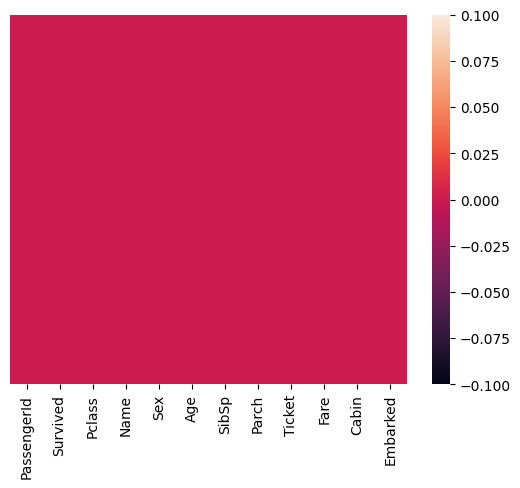

In [68]:
sns.heatmap(df.isnull(),yticklabels=False)

<Axes: >

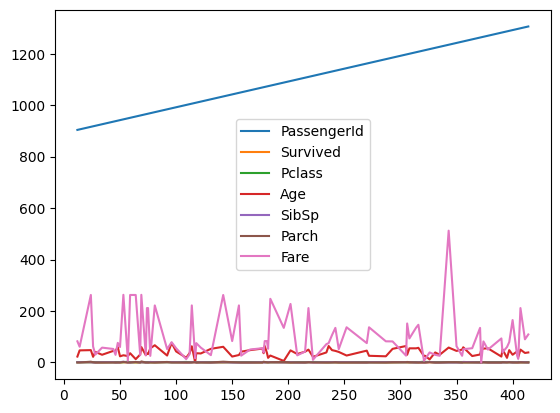

In [69]:
df.plot()

In [70]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [71]:
#getting dummies from all categoriocal values
for col in df.dtypes[df.dtypes == 'object'].index:
    dummified = df.pop(col)
    df= pd.concat([df, pd.get_dummies(dummified, prefix = col)], axis=1)

<Axes: xlabel='Age', ylabel='Count'>

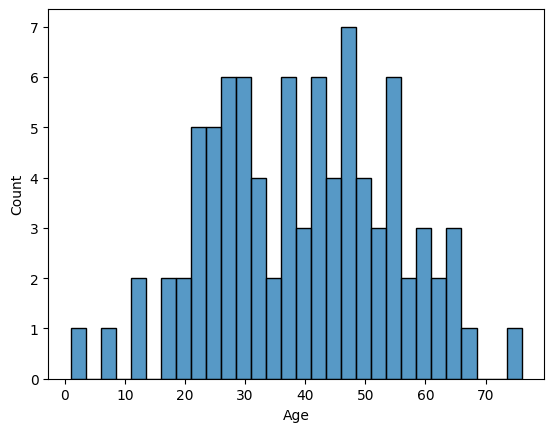

In [72]:
sns.histplot(data=df,x=df['Age'],kde=False,bins=30)

In [73]:
df.Age.mean()

39.247126436781606

In [74]:
df.Age.mode()

0    30.0
1    36.0
2    45.0
3    48.0
4    55.0
Name: Age, dtype: float64

<Axes: xlabel='Age'>

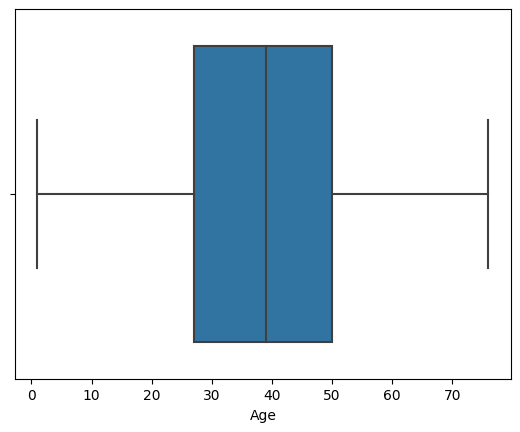

In [75]:
sns.boxplot(data=df, x='Age')

<Axes: xlabel='Pclass', ylabel='Age'>

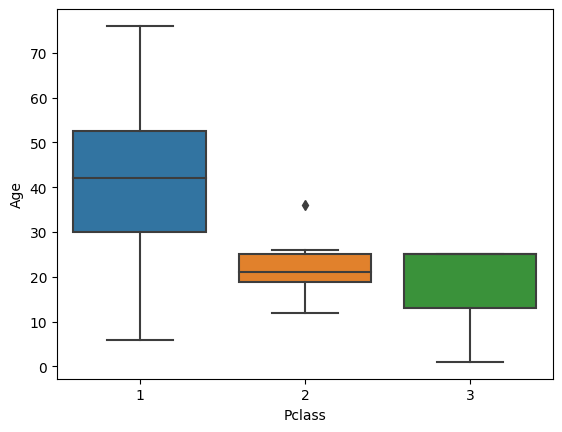

In [76]:
sns.boxplot(data=df,x='Pclass',y='Age')

Surived count


In [77]:
 df.Survived.value_counts(normalize=True)

1    0.505747
0    0.494253
Name: Survived, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

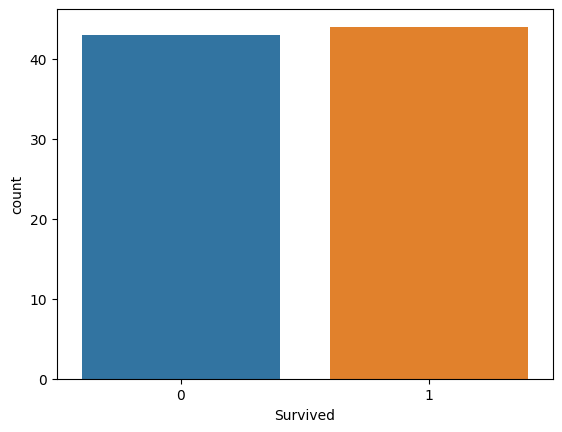

In [78]:
sns.countplot(data=df,x='Survived')

In [82]:
df['Fare'].mean()

98.10919770114941

In [83]:
test = df['Survived']

In [87]:
df = pd.concat([df[:len(df)], df['Survived']], axis=1, sort=False)

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df,test, test_size = 0.25)

In [58]:
from sklearn.linear_model import LogisticRegression

In [92]:
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(y_test, clf.predict(x_test))

1.0

knn


In [94]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [95]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
accuracy_score(y_test, neigh.predict(x_test))

0.5454545454545454